Aim of the notebook: use sklearn scalar feature models to predict GEMS emotions.

1. Generate MIDI files
2. extract features with jSymbolic in directory symbolicFeatureExtraction/jSymbolic_2_2_user
3. Open and run the notebook stage2_feature_extaction/symbolicFeatureExtraction/PandaFeatures_xml2csvJSymbolicFeatures.ipynb to extract features and merge those with the jSymbolic features
4. extract auido features stage2_feature_extraction/audioFeatureExtraction/audio_featureExtraction.ipynb
5. run this notebook to make class/regressive predictions for scalar features

# 0. import stuff, pre-work


In [1]:
import pandas as pd
import sys
import os

In [2]:
sys.path.insert(0, '../../stage-1/overall_used_tools')
import requirements_check as rc

rc.check(sys, [pd,os])

Your version identical with original version 
-> pandas 
-> 1.3.5


For 
os 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


Your version identical with original version 
-> sys 
-> 3.7.3




**ATTENTION: Go directly to 2. when the dataframe with its labels is already generated.**

# 1. import all features and fusion them

## 1.1 Making audio and MIDI features ready

In [5]:
audio_feat_path = '../../stage2_feature_extraction/audioFeatureExtraction/RESULTS/audio_ScalarFeat_BOWFeat.csv'

audio_df = pd.read_csv(audio_feat_path)

audio_df.set_index('name', inplace=True)
audio_df.columns = 'audio_' + audio_df.columns 

In [6]:
# There are three samples in the audio2midi converter dataset which have a slightly different sample_id
# the for the human generated dataset (and the csv file from which the MP3-Codes are coming from). 
# Change the affected lines:
def fit_samples(df):
    # the case for dataset_machine_feat
    mask1 = df['sample_id']=='H_Jay-Z_HardKno_accompaniment'
    df['sample_id'][mask1] = 'H_JayZ_HardKno_accompaniment'

    mask2 = df['sample_id']=='K_Saint-Seans_Carniva_accompaniment'
    df['sample_id'][mask2] = 'K_Saint-Saens_Carniva_accompaniment'

    mask3 = df['sample_id']=='K_Schumann_EtudesS_accompaniment'
    df['sample_id'][mask3] = 'K_Schumann_EtudeS_accompaniment'

    return df

In [9]:
folder_symbolic_dataframes = 'resulting_symbolic_dataframes/' 
title_start = 'symbolic_dataframe_'
list_dataframes = ['audio2midiWang', 'audio2midiWang_mergedMIDIs', 'human_fullSongs', 'human_snippets', 'audio2midiBasicPitch']
user_ind = input(f'Fix an int index to select the wanted data source from following list: {list_dataframes}' )
title_end = list_dataframes[int(user_ind)]

path = f'../../stage2_feature_extraction/symbolicFeatureExtraction/{folder_symbolic_dataframes}{title_start}{title_end}.csv'

df_merged = pd.read_csv(path)
df_merged = fit_samples(df_merged)

Fix an int index to select the wanted data source from following list: ['audio2midiWang', 'audio2midiWang_mergedMIDIs', 'human_fullSongs', 'human_snippets', 'audio2midiBasicPitch']0


/home/c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


## 1.2 clean df from unwanted columns (not containing scalar numerical values)

In [10]:
sys.path.insert(0, '../../stage2_feature_extraction/audioFeatureExtraction')
import BOW 
bc = BOW.BOWConverter(path)
df_merged = bc.df_col_cleaning(snippets_padded_by_breaks=False) 
df_merged.columns = 'midi_' + df_merged.columns

Your version identical with original version 
-> pandas 
-> 1.3.5


For 
collections 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


Your version identical with original version 
-> numpy 
-> 1.21.6


For 
os 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


Your version identical with original version 
-> re 
-> 2.2.1


Your version identical with original version 
-> sys 
-> 3.7.3


pre condition: we need column 'sample_id' at first position which describes the sample names
CALL WHEN YOU HAVE DATAFRAME WITH LIST ENTRIES WHICH SHALL BECOME ELEMENTWISE ENTRIES


In [11]:
final_df = df_merged
final_df

,midi_Number of Pitches,midi_Number of Pitch Classes,midi_Number of Common Pitches,midi_Number of Common Pitch Classes,midi_Range,midi_Importance of Bass Register,midi_Importance of Middle Register,midi_Importance of High Register,midi_Dominant Spread,midi_Strong Tonal Centres,...,midi_nd_Lskew,midi_nd_Lkurt,midi_nd_Lmax,midi_nd_Lmin,midi_nd_OTmean,midi_nd_OTstd,midi_nd_OTskew,midi_nd_OTkurt,midi_nd_OTmax,midi_nd_OTmin
name,,,,,,,,,,,,,,,,,,,,,
'P_Rihanna_Umbrell_accompaniment.wav',22.0,8.0,3.0,2.0,40.0,0.3497,0.63190,0.01840,4.0,3.0,...,3.771751,663.569404,227.0,0.0,64.326087,92.772057,4.071272,4214.246385,572.0,0.0
'K_Tschaikowski_Schwane_accompaniment.wav',36.0,11.0,1.0,1.0,48.0,0.2866,0.47130,0.24200,5.0,3.0,...,1.721308,1357.427343,211.0,0.0,36.166667,24.765007,0.158374,8.776477,91.0,0.0
'P_DanielPowter_BadDay_accompaniment.wav',20.0,7.0,2.0,1.0,41.0,0.2143,0.72860,0.05714,6.0,1.0,...,1.147969,56.053805,376.0,0.0,57.111111,25.339668,1.240435,1.337536,116.0,22.0
'P_BeachBoys_Wouldnt_accompaniment.wav',21.0,8.0,3.0,2.0,38.0,0.2079,0.75250,0.03960,5.0,2.0,...,2.316408,104.427511,185.0,0.0,32.000000,24.990525,3.457754,102.767857,132.0,0.0
'H_eRRdeKa_Edoppel_accompaniment.wav',21.0,8.0,4.0,1.0,40.0,0.3516,0.61720,0.03125,3.0,2.0,...,1.951822,60.452465,166.0,0.0,40.769231,38.562943,2.667678,196.443030,168.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'P_Wrabel_TheVill_accompaniment.wav',18.0,6.0,3.0,2.0,39.0,0.3455,0.60910,0.04545,3.0,2.0,...,-0.221354,14.537024,110.0,0.0,38.000000,55.200932,1.632602,119.866308,161.0,0.0
'H_Eminem_ShakeTh_accompaniment.wav',14.0,6.0,4.0,3.0,38.0,0.2262,0.77380,0.00000,2.0,2.0,...,1.844377,0.201331,61.0,29.0,31.742188,7.808495,7.799614,30.660039,95.0,28.0
'H_Pharcyde_PassinM_accompaniment.wav',8.0,5.0,3.0,1.0,38.0,0.9369,0.06306,0.00000,1.0,2.0,...,0.676697,1.036287,79.0,19.0,36.809524,22.659212,1.166270,30.244787,118.0,0.0


## 1.2 Normalize df

In [12]:
final_df = pd.concat([final_df, audio_df], axis=1)

final_df.dropna(inplace=True)

# normalizing df/features:
final_df =(final_df-final_df.mean())/final_df.std()

# drop columns where only nan values because for normalization only one value, e.g. 0, was in it:
final_df.dropna(axis=1, inplace=True)

## 1.3 import labels, convert them to categorical and add them to dataframe

In [17]:
# getting binary labels
import labels 

user_input = input('Categorical or regressive labels? [c/r]')
label_path = '../../stage0_provided_information/gems-emotion-tags-main/data/GEMS_songs_overview.csv'
if user_input.lower() == 'c':
    la_df = labels.get_categorical_labels(label_path)
    store_mark = '_categorical_'
    regression = False
elif user_input.lower() == 'r':
    la_df = labels.get_regressive_labels(label_path)
    store_mark = '_regressive_'
    regression = True

la_df 

Categorical or regressive labels? [c/r]c


/home/c/Schreibtisch/ba_08102022/stage3_models/unimodal_scalarFeatures_model/labels.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['MP3-Code']= label_df['MP3-Code'] + '_accompaniment' # add to each cell a string in a certain column
/home/c/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/c/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

We import a csv file where we need the columns 'MP3-Code','sublimity','vitality','unease'. 'MP3-Code' describes the ID of each sample.
proportion of amount of samples (out of 370) with... ...zero ...one ...two ...three labels:
0.0 0.7753424657534247 0.2136986301369863 0.010958904109589041


/home/c/Schreibtisch/ba_08102022/stage3_models/unimodal_scalarFeatures_model/labels.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['final_label'] = label_sample_list.tolist()
/home/c/Schreibtisch/ba_08102022/stage3_models/unimodal_scalarFeatures_model/labels.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['sample_id'] = "'" + label_df['sample_id'] + ".wav'"


,final_label
name,
'H_Trailerpark_Schlech_accompaniment.wav',"[0, 0, 1]"
'H_Desiigner_Panda_accompaniment.wav',"[0, 1, 0]"
'H_NAS_DooRags_accompaniment.wav',"[1, 1, 0]"
'H_DMX_XGonGiv_accompaniment.wav',"[0, 1, 0]"
'H_Xatar_MeineGr_accompaniment.wav',"[0, 1, 0]"
...,...
'P_Bilderbuch_Maschin_accompaniment.wav',"[0, 0, 1]"
'P_FletwoodMac_Dreams_accompaniment.wav',"[1, 0, 0]"
'P_Oasis_DontLoo_accompaniment.wav',"[0, 0, 1]"


In [19]:
# concatenate labels with the final_df:
final_df_labeled = pd.concat([final_df, la_df], axis=1)
final_df_labeled.dropna(inplace=True)
final_df_labeled

,midi_Number of Pitches,midi_Number of Pitch Classes,midi_Number of Common Pitches,midi_Number of Common Pitch Classes,midi_Range,midi_Importance of Bass Register,midi_Importance of Middle Register,midi_Importance of High Register,midi_Dominant Spread,midi_Strong Tonal Centres,...,audio_W(17),audio_W(18),audio_W(19),audio_W(20),audio_W(21),audio_W(22),audio_W(23),audio_W(24),audio_W(25),final_label
name,,,,,,,,,,,,,,,,,,,,,


In [22]:
path_start = 'dataframes/'
os.makedirs(path_start, exist_ok=True)
title_start = 'audioAndSymbolic_dataframe'
saving_path = f'{path_start}{title_start}{store_mark}{title_end}.csv'

final_df_labeled.to_csv(saving_path)

# 2. select top features and train on different models

## 2.0 reload the final_df from above which was saved as .csv

In [26]:
path_start = 'dataframes/'

title_start = 'audioAndSymbolic_dataframe'

user_label = input('Do you want categorical or regressive labels? [c/r]')
if user_label.lower() == 'c':
    store_mark = '_categorical_'
    regression = False
elif user_label.lower() == 'r':
    store_mark = '_regressive_'
    regression = True

list_dataframes = ['audio2midiWang', 'audio2midiWang_mergedMIDIs', 'human_fullSongs', 'human_snippets', 'audio2midiBasicPitch']
user_ind = input(f'Fix an int index to select the wanted data source from following list: {list_dataframes}' )
title_end = list_dataframes[int(user_ind)]

loading_path = f'{path_start}{title_start}{store_mark}{title_end}.csv'

final_df_merged = pd.read_csv(loading_path) # final_df_merged_midi.csv   
final_df_merged.set_index('name', inplace=True)
final_df_merged.head()

Do you want categorical or regressive labels? [c/r]c
Fix an int index to select the wanted data source from following list: ['audio2midiWang', 'audio2midiWang_mergedMIDIs', 'human_fullSongs', 'human_snippets', 'audio2midiBasicPitch']1


,midi_Number of Pitches,midi_Number of Pitch Classes,midi_Number of Common Pitches,midi_Number of Common Pitch Classes,midi_Range,midi_Importance of Bass Register,midi_Importance of Middle Register,midi_Importance of High Register,midi_Dominant Spread,midi_Strong Tonal Centres,...,audio_W(240)_lld,audio_W(241)_lld,audio_W(242)_lld,audio_W(243)_lld,audio_W(244)_lld,audio_W(245)_lld,audio_W(246)_lld,audio_W(247)_lld,audio_W(248)_lld,final_label
name,,,,,,,,,,,,,,,,,,,,,
'P_EllieGoulding_Burn_accompaniment.wav',0.192718,0.424776,-0.569502,-0.670164,-0.498481,0.027775,0.612884,-0.608960,-1.655513,1.421307,...,0.806289,-0.361214,-0.239492,-0.217144,-0.329694,-0.540016,0.426055,-0.243532,-0.225078,"[0, 1, 0]"
'P_TameImpala_TheLess_accompaniment.wav',1.054574,0.990674,-0.569502,-0.670164,0.023882,1.336032,-0.675861,-0.800516,-0.789984,0.003536,...,-0.472775,-0.361214,-0.239492,-0.217144,-0.329694,-0.540016,0.426055,0.697083,-0.225078,"[1, 0, 0]"
'K_Beethoven_Mondsch_accompaniment.wav',0.049075,-0.141122,0.298826,2.266837,-0.324360,-0.594912,1.144469,-0.440274,0.075545,0.003536,...,0.018812,-0.361214,0.786544,-0.217144,-0.329694,0.799139,1.357665,-2.266476,-0.225078,"[1, 0, 1]"
'K_Wagner_Tristan_accompaniment.wav',-1.243710,-1.272917,0.298826,2.266837,0.023882,-0.459945,-0.107554,0.596771,0.941074,0.003536,...,1.477668,-0.361214,1.386736,-0.217144,-0.329694,1.994723,1.357665,-0.990140,-0.225078,"[0, 0, 1]"
'P_NinaSimone_Feeling_accompaniment.wav',1.772788,0.990674,-0.569502,-0.670164,1.068607,-0.209950,0.132009,0.101367,-0.789984,1.421307,...,0.213902,-0.361214,0.786544,-0.217144,-0.329694,-0.540016,1.357665,0.697083,-0.225078,"[1, 1, 0]"


In [27]:
if int(user_ind) in [1,2,3]:
    slicer = 3
else:
    slicer = 2
data_name = '_'.join((loading_path.split('.')[0]).split('_')[-slicer:])
data_name

'categorical_audio2midiWang_mergedMIDIs'

In [ ]:
"""
final_df_merged = pd.read_csv('final_df_merged_midi.csv')
final_df_merged.set_index('name', inplace=True)
final_df_merged.head()
"""

## 2.2 load the .py file for pipelined scalar feature training

In [28]:
from feature_reduction import PipelinedScalarTraining
pst = PipelinedScalarTraining()


start process


In [29]:
pst.dataset_preparation(final_df_merged,regression=regression)

PUT IN A DATAFRAME AS ARUMENT HERE WHICH CONTAINS THE FEATURES AND IN ADDITION THE COLUMN FOR Y-LABELS 'final_label' IN FORMAT OF [0 0 1]


## 2.3 Visualize label distributions

Put in regressive values!
proportion of amount of samples (out of 370) with... ...zero ...one ...two ...three labels:
0.0 0.6560509554140127 0.3248407643312102 0.01910828025477707


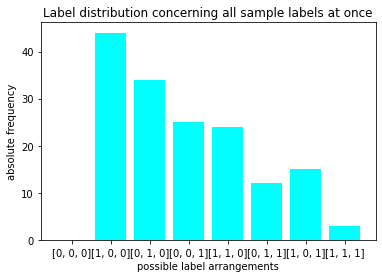

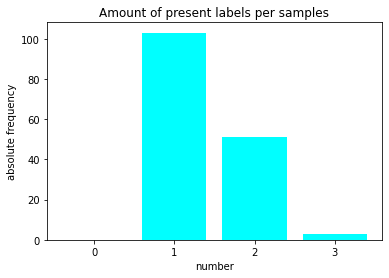

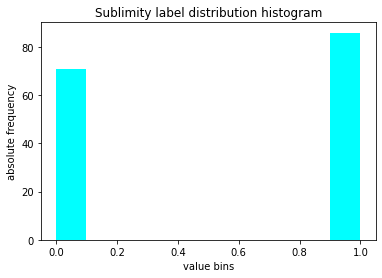

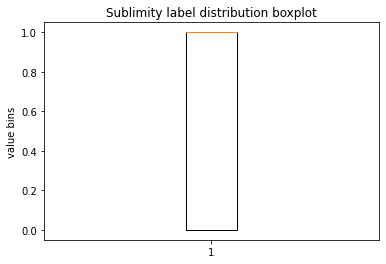

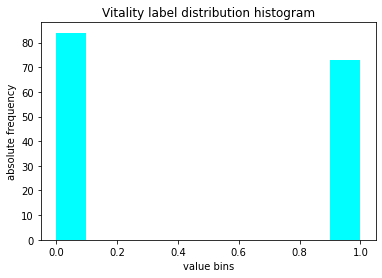

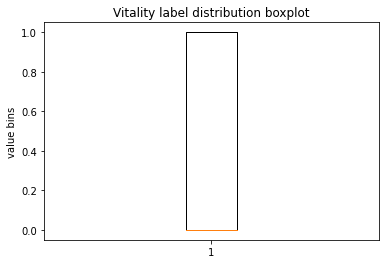

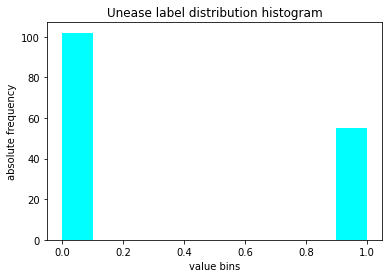

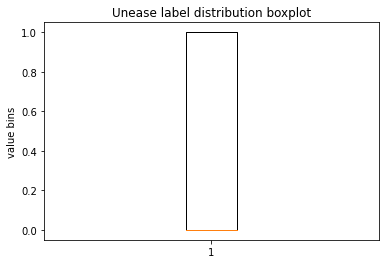

In [72]:
# Visualize label distributions by putting in individual labels:
import labels
labels.visualizer(pst.y1,pst.y2,pst.y3,median_mode=True)

Put in regressive values!
proportion of amount of samples (out of 370) with... ...zero ...one ...two ...three labels:
0.0 0.9299363057324841 0.07006369426751592 0.0


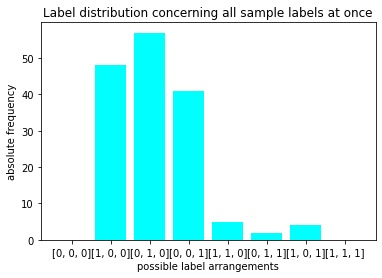

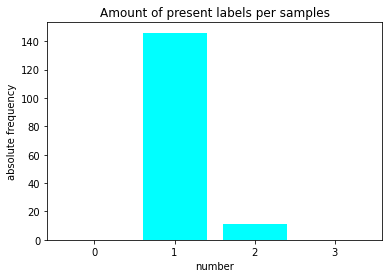

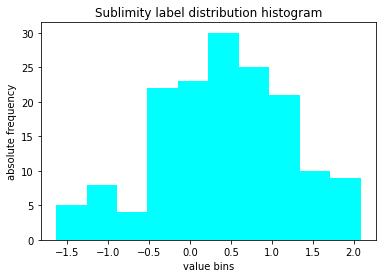

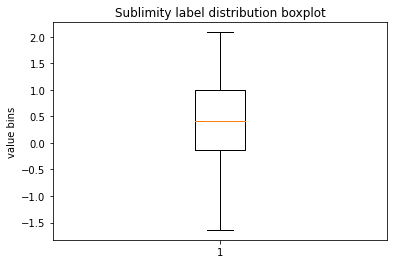

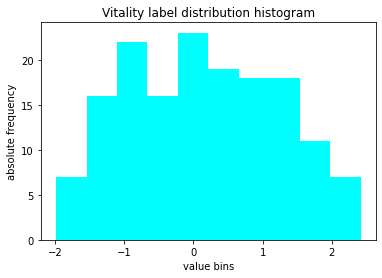

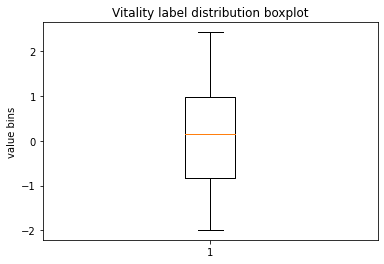

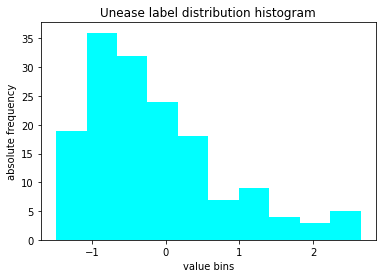

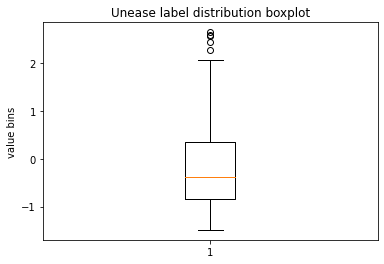

In [8]:
labels.visualizer(pst.y1,pst.y2,pst.y3,median_mode=False) # use mean as comparison base

## 2.3 select top features

In [30]:
user_question = input('Search for top k parameters (type in int k) or use already find features (-1)?')
if int(user_question) > 0:
    pst.select_top_features(feature_number_approach1=int(user_question), feature_number_approach2=int(user_question), categorical=not regression)
else:
    pst.x = final_df_merged[['audio_tonal.hpcp_entropy.stdev', 'audio_pcm_fftMag_spectralRollOff90.0_sma_leftctime_f2', 'audio_audspec_lengthL1norm_sma_de_stddevRisingSlope_f2', 'audio_F0final_sma_de_flatness_f2', 'audio_pcm_fftMag_spectralSlope_sma_de_maxSegLen_f2', 'audio_logHNR_sma_de_lpgain_f2', 'audio_jitterDDP_sma_linregc2_f2', 'audio_pcm_fftMag_spectralSkewness_sma_peakDistStddev_f2', 'audio_pcm_fftMag_spectralEntropy_sma_de_iqr2-3_f2', 'audio_lowlevel.dissonance.mean', 'audio_F0_sma_maxPos', 'audio_logHNR_sma_lpc4_f2', 'audio_tonal.hpcp_entropy.mean', 'audio_pcm_fftMag_spectralVariance_sma_de_iqr2-3_f2', 'audio_audspec_lengthL1norm_sma_lpc3_f2', 'audio_pcm_fftMag_spectralSlope_sma_de_quartile2_f2', 'audio_pcm_fftMag_spectralSkewness_sma_lpc2_f2', 'audio_pcm_fftMag_spectralSlope_sma_de_minRangeRel_f2', 'audio_pcm_fftMag_spectralEntropy_sma_de_quartile3_f2', 'audio_audspec_lengthL1norm_sma_de_iqr2-3_f2', 'audio_pcm_fftMag_spectralEntropy_sma_de_iqr1-2_f2', 'audio_shimmerLocal_sma_de_upleveltime90_f2', 'audio_tonal.tuning_diatonic_strength', 'audio_lowlevel.spectral_entropy.mean', 'audio_audspec_lengthL1norm_sma_de_upleveltime50_f2', 'audio_audspec_lengthL1norm_sma_iqr2-3_f2', 'audio_audspec_lengthL1norm_sma_de_iqr1-3_f2', 'midi_Average Note Duration', 'audio_audspec_lengthL1norm_sma_de_quartile1_f2', 'audio_audspec_lengthL1norm_sma_de_iqr1-2_f2']]

Search for top k parameters (type in int k) or use already find features (-1)?-1


Top features 30 with potential to 40 for regressive Human-generated snippets:<br>
Index(['audio_tonal.hpcp_entropy.stdev',
       'audio_pcm_fftMag_spectralRollOff90.0_sma_leftctime_f2',
       'audio_audspec_lengthL1norm_sma_de_stddevRisingSlope_f2',
       'audio_F0final_sma_de_flatness_f2',
       'audio_pcm_fftMag_spectralSlope_sma_de_maxSegLen_f2',
       'audio_logHNR_sma_de_lpgain_f2', 'audio_jitterDDP_sma_linregc2_f2',
       'audio_pcm_fftMag_spectralSkewness_sma_peakDistStddev_f2',
       'audio_pcm_fftMag_spectralEntropy_sma_de_iqr2-3_f2',
       'audio_lowlevel.dissonance.mean', 'audio_F0_sma_maxPos',
       'audio_logHNR_sma_lpc4_f2', 'audio_tonal.hpcp_entropy.mean',
       'audio_pcm_fftMag_spectralVariance_sma_de_iqr2-3_f2',
       'audio_audspec_lengthL1norm_sma_lpc3_f2',
       'audio_pcm_fftMag_spectralSlope_sma_de_quartile2_f2',
       'audio_pcm_fftMag_spectralSkewness_sma_lpc2_f2',
       'audio_pcm_fftMag_spectralSlope_sma_de_minRangeRel_f2',
       'audio_pcm_fftMag_spectralEntropy_sma_de_quartile3_f2',
       'audio_audspec_lengthL1norm_sma_de_iqr2-3_f2',
       'audio_pcm_fftMag_spectralEntropy_sma_de_iqr1-2_f2',
       'audio_shimmerLocal_sma_de_upleveltime90_f2',
       'audio_tonal.tuning_diatonic_strength',
       'audio_lowlevel.spectral_entropy.mean',
       'audio_audspec_lengthL1norm_sma_de_upleveltime50_f2',
       'audio_audspec_lengthL1norm_sma_iqr2-3_f2',
       'audio_audspec_lengthL1norm_sma_de_iqr1-3_f2',
       'midi_Average Note Duration',
       'audio_audspec_lengthL1norm_sma_de_quartile1_f2',
       'audio_audspec_lengthL1norm_sma_de_iqr1-2_f2'],
      dtype='object')

## 2.4 train and evaluate models

### 2.4.1 knn

In [24]:
chosen_est_para_y1, best_score_y1, chosen_est_para_y2, best_score_y2, chosen_est_para_y3, best_score_y3= pst.my_knn(regression=regression, data_name=data_name)
chosen_est_para_y1, best_score_y1, chosen_est_para_y2, best_score_y2, chosen_est_para_y3, best_score_y3
# scores returned

start knn:
start train:
regression False
training for y output round:  0 /2
best vali score 0.64
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_pcm_fftMag_spectralSkewness_sma_peakDistStddev_f2')),
                ('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=51))])
best vali score 0.6799999999999999
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_pcm_fftMag_spectralVariance_sma_de_iqr2-3_f2')),
                ('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=11))])
best vali score 0.6533333333333333
best vali est Pipeline(steps=[('selector', Selector(features='midi_Average Note Duration')),
                ('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=21))])
best vali score 0.64
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_pcm_fftMag_spectralEntropy_sma_

('n_neighbors=21weights=uniform',
 0.6875,
 'n_neighbors=41weights=uniform',
 0.5625,
 'n_neighbors=21weights=uniform',
 0.6875)

### 2.4.2 SVM

In [31]:
results_svm = pst.my_svm(regression=regression, data_name=data_name)
results_svm

start train:
regression False
training for y output round:  0 /2
best vali score 0.6242424242424243
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_tonal.hpcp_entropy.mean')),
                ('scaler', StandardScaler()),
                ('clf', SVC(C=0.1, kernel='sigmoid'))])
best vali score 0.6424242424242423
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_audspec_lengthL1norm_sma_de_stddevRisingSlope_f2')),
                ('scaler', StandardScaler()), ('clf', SVC(C=0.9))])
best vali score 0.6303030303030303
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_tonal.hpcp_entropy.stdev')),
                ('scaler', StandardScaler()), ('clf', SVC(C=12.0))])
best vali score 0.6303030303030303
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_audspec_lengthL1norm_sma_de_upleveltime50_f2')),
                ('scaler', StandardScaler()),
           

('C=0.1gamma=scalekernel=sigmoid',
 0.6111111111111112,
 'C=2.0gamma=scalekernel=rbf',
 0.625,
 'C=42.0gamma=scalekernel=sigmoid',
 0.5833333333333334)

Your version identical with original version 
-> sklearn 
-> 1.0.2


For 
pickle 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


For 
os 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


Your version identical with original version 
-> numpy 
-> 1.21.6


Your version identical with original version 
-> pandas 
-> 1.3.5


For 
collections 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


Your version identical with original version 
-> sys 
-> 3.7.3


Your version identical with original version 
-> sklearn 
-> 1.0.2


For 
pickle 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


For 
os 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 

### 2.4.3 MLP

In [17]:
results_mlp = pst.my_mlp(regression=regression, data_name=data_name)
results_mlp

start train:
training for binary y output round:  0 /2


/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

training for binary y output round:  1 /2


/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

training for binary y output round:  2 /2


/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/c/anaconda3/lib/python3.7/site-pac

start storing model in  clf/_mlp_y1
start storing model in  clf/_mlp_y2
start storing model in  clf/_mlp_y3


('activation=tanhbatch_size=16',
 -0.0015850586758089924,
 'activation=relubatch_size=32',
 0.12930124031286128,
 'activation=tanhbatch_size=64',
 -0.021561888153543984)

### 2.4.4 RF

In [34]:
results_rf = pst.my_rf(regression=regression, data_name=data_name)
results_rf

start train:
regression False
training for y output round:  0 /2
best vali score 0.6242424242424243
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_pcm_fftMag_spectralSlope_sma_de_maxSegLen_f2')),
                ('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(criterion='entropy', n_estimators=50,
                                        n_jobs=-1))])
best vali score 0.6363636363636365
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_audspec_lengthL1norm_sma_iqr2-3_f2')),
                ('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(n_estimators=50, n_jobs=-1))])
best vali score 0.6
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_pcm_fftMag_spectralSlope_sma_de_minRangeRel_f2')),
                ('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(criterion='entr

/home/c/Schreibtisch/ba_08102022/stage3_models/unimodal_scalarFeatures_model/feature_reduction.py:249: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  estimator_collector_sets = np.empty((len(datasets),np.array(estimator_collector).shape[0],np.array(estimator_collector).shape[1]),dtype='object')
/home/c/Schreibtisch/ba_08102022/stage3_models/unimodal_scalarFeatures_model/feature_reduction.py:253: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  estimator_collector_sets[dataset_ind] = np.array(estimator_collector)


best vali score 0.6
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_lowlevel.dissonance.mean')),
                ('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(criterion='entropy', n_estimators=50,
                                        n_jobs=-1))])
best vali score 0.6060606060606062
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_audspec_lengthL1norm_sma_de_stddevRisingSlope_f2')),
                ('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(criterion='entropy', n_estimators=50,
                                        n_jobs=-1))])
best vali score 0.593939393939394
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_pcm_fftMag_spectralSkewness_sma_peakDistStddev_f2')),
                ('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(criter

/home/c/Schreibtisch/ba_08102022/stage3_models/unimodal_scalarFeatures_model/feature_reduction.py:253: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  estimator_collector_sets[dataset_ind] = np.array(estimator_collector)


best vali score 0.6
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_audspec_lengthL1norm_sma_de_upleveltime50_f2')),
                ('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(n_estimators=50, n_jobs=-1))])
best vali score 0.6121212121212121
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_lowlevel.dissonance.mean')),
                ('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(criterion='entropy', n_estimators=50,
                                        n_jobs=-1))])
best vali score 0.6484848484848486
best vali est Pipeline(steps=[('selector',
                 Selector(features='audio_audspec_lengthL1norm_sma_de_upleveltime50_f2')),
                ('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(n_estimators=50, n_jobs=-1))])
best vali score 0.6242424242424243
best vali est Pipeline(steps=[('selector',


/home/c/Schreibtisch/ba_08102022/stage3_models/unimodal_scalarFeatures_model/feature_reduction.py:253: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  estimator_collector_sets[dataset_ind] = np.array(estimator_collector)


('n_estimators=50criterion=entropy',
 0.5277777777777778,
 'n_estimators=50criterion=entropy',
 0.5277777777777778,
 'n_estimators=50criterion=gini',
 0.513888888888889)

Your version identical with original version 
-> sklearn 
-> 1.0.2


For 
pickle 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


For 
os 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


Your version identical with original version 
-> numpy 
-> 1.21.6


Your version identical with original version 
-> pandas 
-> 1.3.5


For 
collections 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


Your version identical with original version 
-> sys 
-> 3.7.3


Your version identical with original version 
-> sklearn 
-> 1.0.2


For 
pickle 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


For 
os 
python version needs to fit 
-> original version 3.7.3 
-> your version 3.7.3 (default, Mar 27 

## 3. Results on test set

Categorical Labeled Human generated snippets with top 30:

* ('n_neighbors=81weights=uniform',
 0.625,
 'n_neighbors=41weights=uniform',
 0.4375,
 'n_neighbors=21weights=uniform',
 0.6875)

* ('C=72.0gamma=scalekernel=rbf',
 0.625,
 'C=22.0gamma=scalekernel=rbf',
 0.6875,
 'C=22.0gamma=scalekernel=rbf',
 0.6875)

* ('activation=relubatch_size=64',
 0.6875,
 'activation=tanhbatch_size=32',
 0.5625,
 'activation=tanhbatch_size=16',
 0.75)

* ('n_estimators=50criterion=entropy',
 0.5833333333333334,
 'n_estimators=50criterion=entropy',
 0.5,
 'n_estimators=50criterion=entropy',
 0.4791666666666667)

Regressive Labeled Human generated snippets with top 30:

* ('n_neighbors=11weights=uniform',
 -0.043719367544648335,
 'n_neighbors=61weights=uniform',
 0.006278207337156894,
 'n_neighbors=91weights=distance',
 -0.19303891882314672)

* ('C=12.0gamma=scalekernel=rbf',
 0.12947045508331678,
 'C=22.0gamma=autokernel=rbf',
 0.0007367891495840828,
 'C=52.0gamma=scalekernel=rbf',
 0.026174942445302274)

* ('activation=tanhbatch_size=16',
 -0.0015850586758089924,
 'activation=relubatch_size=32',
 0.12930124031286128,
 'activation=tanhbatch_size=64',
 -0.021561888153543984)

* MLP bigger architecture: ('activation=tanhbatch_size=16',
 -0.0004748452510652257,
 'activation=tanhbatch_size=1',
 -0.10793764543466322,
 'activation=tanhbatch_size=16',
 -0.0020013752549312702)

* 'n_estimators=230criterion=absolute_error': [0.1239763621536849]
  'n_estimators=250criterion=absolute_error': [0.41026053781128924]
'n_estimators=170criterion=squared_error': [-0.17580046815679906]

Categorical Labeled Basic Pitch generated snippets with top 30:


* ('n_neighbors=51weights=uniform',
 0.6388888888888888,
 'n_neighbors=51weights=uniform',
 0.6111111111111112,
 'n_neighbors=21weights=uniform',
 0.5416666666666667)

* ('C=0.5gamma=scalekernel=sigmoid',
 0.6111111111111112,
 'C=52.0gamma=scalekernel=rbf',
 0.5694444444444444,
 'C=0.5gamma=scalekernel=sigmoid',
 0.6666666666666666)

*

* ('n_estimators=170criterion=entropy',
 0.5,
 'n_estimators=50criterion=gini',
 0.7222222222222222,
 'n_estimators=70criterion=entropy',
 0.6388888888888888)

Regressive Labeled Basic Pitch generated snippets with top 30:

* ('n_neighbors=91weights=distance',
 0.10151348525091419,
 'n_neighbors=11weights=uniform',
 -0.11866860786562221,
 'n_neighbors=51weights=uniform',
 -0.021554415676517502)

* ('C=2.0gamma=autokernel=rbf',
 0.07021007177158278,
 'C=2.0gamma=scalekernel=rbf',
 0.02779754757138464,
 'C=52.0gamma=autokernel=rbf',
 -0.13294405699533574)

*

* ('n_estimators=190criterion=absolute_error',
 -0.20993678327444898,
 'n_estimators=190criterion=absolute_error',
 -0.3788592381570326,
 'n_estimators=50criterion=absolute_error',
 -0.4560841764213954)

Categorical Labeled Human generated full songs with top 30:

* ('n_neighbors=11weights=distance',
 0.65625,
 'n_neighbors=1weights=uniform',
 0.625,
 'n_neighbors=31weights=distance',
 0.5625)

* ('C=2.0gamma=scalekernel=rbf',
 0.5625,
 'C=0.9gamma=scalekernel=sigmoid',
 0.4375,
 'C=22.0gamma=scalekernel=rbf',
 0.75)

*

* ('n_estimators=50criterion=entropy',
 0.4791666666666667,
 'n_estimators=50criterion=gini',
 0.625,
 'n_estimators=50criterion=entropy',
 0.625)

Regressive Labeled Human generated full songs with top 30:

* ('n_neighbors=11weights=uniform',
 -0.09250878967146403,
 'n_neighbors=11weights=uniform',
 -0.010837552368994086,
 'n_neighbors=81weights=distance',
 -0.0634206582855028)
 
* ('C=0.9gamma=autokernel=rbf',
 -0.033844467422823765,
 'C=0.5gamma=scalekernel=linear',
 0.1288851294129698,
 'C=52.0gamma=autokernel=rbf',
 -0.0351633889508578)

*

* ('n_estimators=70criterion=absolute_error',
 -0.41776516555980736,
 'n_estimators=70criterion=absolute_error',
 0.056886591429391564,
 'n_estimators=110criterion=absolute_error',
 0.1753185126957174)

Categorical Labeled audio2midi converter Wang with top 30:

* ('n_neighbors=31weights=uniform',
 0.6388888888888888,
 'n_neighbors=11weights=uniform',
 0.5555555555555556,
 'n_neighbors=11weights=distance',
 0.5555555555555556)

* ('C=0.9gamma=scalekernel=sigmoid',
 0.6388888888888888,
 'C=72.0gamma=scalekernel=sigmoid',
 0.5555555555555556,
 'C=72.0gamma=scalekernel=rbf',
 0.5555555555555556)

*

* ('n_estimators=50criterion=entropy',
 0.6388888888888888,
 'n_estimators=50criterion=entropy',
 0.5277777777777778,
 'n_estimators=70criterion=entropy',
 0.5)

Regressive Labeled audio2midi converter Wang with top 30:

* ('n_neighbors=21weights=uniform',
 0.1335830921360024,
 'n_neighbors=41weights=uniform',
 0.013834186736889909,
 'n_neighbors=21weights=uniform',
 0.04446887301276625)

* ('C=0.1gamma=scalekernel=sigmoid',
 -0.011270220221877292,
 'C=2.0gamma=scalekernel=rbf',
 0.007904135441766935,
 'C=22.0gamma=autokernel=rbf',
 -0.046767723813363915)

*

* ('n_estimators=50criterion=absolute_error',
 -0.04094442536055576,
 'n_estimators=150criterion=absolute_error',
 -0.10155641022814876,
 'n_estimators=210criterion=absolute_error',
 -0.23504943205250828)

Categorical Labeled audio2midi converter Wang fusioned with top 30:

* ('n_neighbors=31weights=uniform',
 0.5694444444444444,
 'n_neighbors=31weights=uniform',
 0.5833333333333334,
 'n_neighbors=51weights=uniform',
 0.6388888888888888)

* ('C=92.0gamma=scalekernel=rbf',
 0.5833333333333334,
 'C=22.0gamma=scalekernel=rbf',
 0.6111111111111112,
 'C=2.0gamma=scalekernel=rbf',
 0.5833333333333334)

*

* ('n_estimators=50criterion=entropy',
 0.5972222222222223,
 'n_estimators=50criterion=entropy',
 0.5833333333333334,
 'n_estimators=50criterion=gini',
 0.5)

Regressive Labeled audio2midi converter Wang fusioned with top 30:

* ('n_neighbors=11weights=uniform',
 -0.020302841559795393,
 'n_neighbors=11weights=uniform',
 -0.06047765544709205,
 'n_neighbors=41weights=uniform',
 0.025117734961521143)

* ('C=0.1gamma=scalekernel=rbf',
 -0.0049177366131343825,
 'C=0.1gamma=scalekernel=sigmoid',
 -0.029400005865972467,
 'C=0.5gamma=scalekernel=rbf',
 -0.12969924340467842)

*

* ('n_estimators=50criterion=absolute_error',
 -0.20685196044797416,
 'n_estimators=190criterion=absolute_error',
 -0.43812941207177447,
 'n_estimators=110criterion=absolute_error',
 -0.2542139162017867)

In [7]:
# Look into the stored models:
import pickle
import feature_reduction as fr
FR = fr.PipelinedScalarTraining
name = 'audio2midiWang_mergedMIDIs_knn_y1'
FR.load_model(FR, filename=name,path='.')

start loading model


([Selector(features='audio_tonal.hpcp_entropy.stdev'),
  StandardScaler(),
  KNeighborsRegressor(n_neighbors=11)],
 -0.020302841559795393,
 {'n_neighbors=11weights=uniform': [0.09286799742473029, -0.13347368054432107],
  'n_neighbors=21weights=uniform': [-0.058845423098961014]},
 'knn')